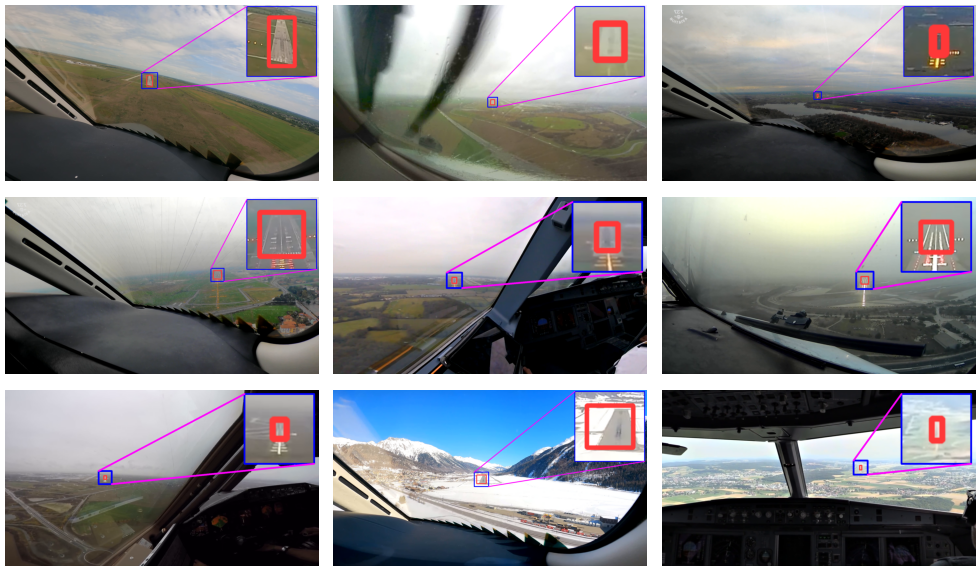

In [1]:
import matplotlib.pyplot as plt
import scienceplots
import os
import cv2

plt.style.use('science')
plt.rcParams['text.usetex'] = False

base_path = "./../runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/"

all_png = [
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/63jby_EMR9o_016.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/BbCWbP7mD4k_023.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/86ghu0Dcaog_082.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/f0GAssHxBI4_039.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/fB33KKArerU_044.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/ocPXQDNk-pk_049.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/JgKWRjH2O10_051.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/kuCuyhYPyXM_118.png',
    'runs/ultralytics/vis/test_real_edge/proposed_finetune_640_only_bbox/LAUBlqZNeiM_021.png',
]

all_png = ["./../" + path for path in all_png]

# 设置图表大小
fig, axes = plt.subplots(3, 3, figsize=(10, 6), dpi=100)
axes = axes.flatten()
            
for image_id, image_path in enumerate(all_png):

    ax = axes[image_id]

    # 读取图像
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[0], img.shape[1]

    # 读取YOLO格式标签
    label_path = os.path.join(os.path.dirname(image_path), 'labels', os.path.basename(image_path).replace('.png', '.txt'))
    with open(label_path, 'r') as f:
        lines = f.readlines()

    # 解析标签
    labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            label = {
                'class': int(parts[0]),
                'x_center': float(parts[1]) * img_width,
                'y_center': float(parts[2]) * img_height,
                'width': float(parts[3]) * img_width,
                'height': float(parts[4]) * img_height
            }
            labels.append(label)

    # 计算bbox
    bboxes = []
    for label in labels:
        bboxes.append([int(label['x_center']), int(label['y_center']), int(label['width']), int(label['height'])])

    # 定义缩放倍数
    zoom_factor = 6

    # 绘制缩放图和连接线
    for i, bbox in enumerate(bboxes):

        # bbox为中心的正方形区域
        x, y, w, h = bbox
        edge = 30
        wh2 = int(max(w, h) / 2)
        x_min = max(x - edge - wh2, 0)
        y_min = max(y - edge - wh2, 0)
        x_max = min(x + edge + wh2, img_width)
        y_max = min(y + edge + wh2, img_height)
        w = x_max - x_min
        h = y_max - y_min

        # 裁剪正方形区域
        zoomed_img = img[y_min:y_max, x_min:x_max]

        # 放大正方形区域
        max_zoom = int(img_width/4.5)
        zoomed_width, zoomed_height = max_zoom, max_zoom  # min(int(w * zoom_factor), max_zoom), min(int(h * zoom_factor), max_zoom)
        zoomed_img_resized = cv2.resize(zoomed_img, (zoomed_width, zoomed_height))

        # 在原图上绘制 正方形区域
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 10)

        # 定义缩放图的插入位置
        edge = 30
        if i == 0:
            zoom_x, zoom_y = img_width - zoomed_width - edge, edge
        elif i == 1:
            zoom_x, zoom_y = edge, edge

        # 插入缩放图
        img[zoom_y:zoom_y + zoomed_height, zoom_x:zoom_x + zoomed_width] = zoomed_img_resized

        # 在缩放图像外侧绘制矩形框
        cv2.rectangle(img, (zoom_x, zoom_y), (zoom_x+zoomed_width, zoom_y+zoomed_height), (255, 0, 0), 10)

        # 计算连接线参数
        connections = [
            ((x - edge - wh2, y - edge - wh2), (zoom_x, zoom_y)),  # 左上角
            ((x + edge + wh2, y + edge + wh2), (zoom_x + zoomed_width, zoom_y)),  # todo 右上角
            ((x - edge - wh2, y + edge + wh2), (zoom_x, zoom_y + zoomed_height)),  # todo 左下角
            ((x + edge + wh2, y + edge + wh2), (zoom_x + zoomed_width, zoom_y + zoomed_height))  # 右下角
        ]

        # 选择合适的两条连接线
        if i == 0:
            selected_connections = [connections[0], connections[3]]
        elif i == 1:
            selected_connections = [connections[1], connections[2]]

        # 绘制选择的连接线
        params = {
            "color": (255, 0, 255),
            "thickness": 10
        }
        for (start, end) in selected_connections:
            cv2.line(img, start, end, **params)

        # 使用plt显示图像
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

plt.tight_layout()
path_save = './../results/images/predictions'
plt.savefig(f'{path_save}/predictions_zoom.jpg', dpi=1200, bbox_inches='tight')
plt.show()

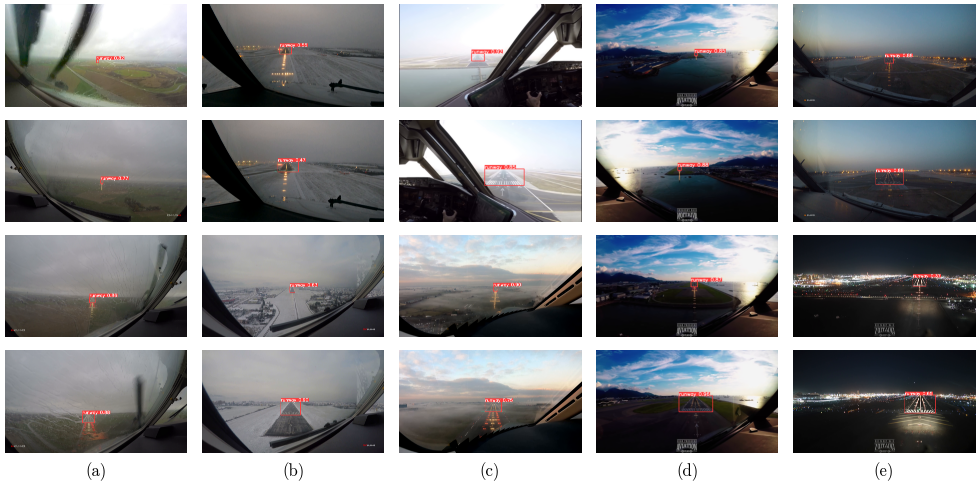

In [2]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')
plt.rcParams['text.usetex'] = False

# 读取 filelist.txt 文件并生成路径列表
file_path = 'filelist.txt'
base_path = "./../runs/ultralytics/vis/test_real_edge/proposed_finetune_640/"
sub_titles = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
categories = ["Rain", "Snow", "Fog", "Backlight", "Low Light"]
images = {category: [] for category in categories}

# 逐行读取文件内容
with open(file_path, 'r') as file:
    current_category = None
    for line in file:
        line = line.strip()
        if line in categories:
            current_category = line
        elif line.endswith(".png") and current_category:
            images[current_category].append(base_path + line)

# 设置图表大小
fig, axes = plt.subplots(4, 5, figsize=(10, 5), dpi=100)

# 遍历每个类别并绘制图片
for col, (title, category) in enumerate(zip(sub_titles, categories)):
    for row in range(4):
        ax = axes[row, col]
        if row < len(images[category]):
            img = plt.imread(images[category][row])
            ax.imshow(img)
        ax.axis('off')
        if row == 3:
            ax.set_title(title, y=-0.30)

plt.tight_layout()
path_save = './../results/images/predictions'
plt.savefig(f'{path_save}/predictions_weather.jpg', dpi=1200, bbox_inches='tight')
plt.show()
